# Credit Score Model

## Summary of the business part

| Title | Credit Score Model | 
| --- | --- |
| **Industry focus** | Banking / Finance |
| **Problem statement** | Based on information about the borrower (e.g. age, number of previous loans, etc.), how to distinguish between "good" and "bad" loans and give an estimate of the probability of default.  |
| **Business use cases**| Application in banking risk management and social credit rating system |  
| **Goals/Metrics** | Assessing the likelihood of a client’s default. |
| **Deliverables** | A notebook outlining findings and recommendations in the decision-making process of accepting or rejecting a loan.| 

## Introduction:
Scorecard model is a model class that is applied in many fields such as finance, business, social management. The Scorecard model has the effect of quantifying an individual or organizational profile into a credit score based on the possibility of default. Based on credit scores, financial institutions or governments can provide better products and services if the individuals or organizations have a high or lower credit score.

The goal of the scorecard model is to assess the repayment capacity of future loan position holders. The input of the Scorecard model includes information in the customer's personal profile. They are collected mainly from the bank's credit bureau or data warehouse. The information is divided into basic groups:
- Demographic: Information related to personal characteristics such as education level, income, gender, age, occupation, marital status, family size, number of dependents, etc.
- Credit history: This is information managed centrally at the bureau credit. Customer loan history data is aggregated from all banks operating in the territory of a country into a data center. Thus, banks can cross-check customer credit information from other banks.
- Transaction information: Transaction history on credit cards or ATM cards will assess a certain part of the customer's financial capacity. Therefore, this information is very useful for debt repayment forecasting.
- Security asset information: This is an information that comes with mortgage loans. The value of the collateral will be a means of covering risks in case the customer defaults.

### Table of contents

##### I. Data preparation<a class="anchor" id="sub_section_1_1_1"></a>
1. Environment setup & Import data
2. Exporatory data analysis

##### II. Modeling <a class="anchor" id="sub_section_1_1_1"></a>
1. WoE Binning/Feature Engineering
2. Logistic regression

##### III.  Evaluation <a class="anchor" id="sub_section_1_1_1"></a>
1. ROC curve on the test set
2. Precision and recall curves on the test set
3. Kolmogorov-Smirnov accreditation

##### IV. Conclusion and Action <a class="anchor" id="sub_section_1_1_1"></a>
1. Calculate credit score for each feature
2. FICO Score
3. Conclusion

## I. Data preparation

### Environment setup

In [99]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from scipy import stats

### Import data

In [100]:
data = pd.read_csv("/Users/thanhhai/Downloads/loan data.csv")
data.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,annual_inc,loan_amount,term,application_type,purpose,interest_payments,loan_condition,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,24000,5000,36 months,INDIVIDUAL,credit_card,Low,Good Loan,10.65,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,30000,2500,60 months,INDIVIDUAL,car,High,Bad Loan,15.27,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,12252,2400,36 months,INDIVIDUAL,small_business,High,Good Loan,15.96,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,49200,10000,36 months,INDIVIDUAL,other,High,Good Loan,13.49,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,80000,3000,60 months,INDIVIDUAL,other,Low,Good Loan,12.69,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [101]:
data.shape

(1048575, 20)

### Exporatory data analysis
This is dataset on employee satisfaction, income and some demographics: 
- Dataset Structure: 1048575 observations (rows), 20 features (variables)
- Missing Data: no missing data
- Data Type: two datatypes in this dataset: objects and integers
- Imbalanced dataset: 86% loans are considered to be good loans while 14% considered to be bad making our **dataset** to be considered imbalanced

| LoanStat | Description | 
| --- | --- |
| year | The year which the loan was funded. |
| issue_d | The day which the loan was funded. |
| final_d | The day which the loan be ended. |
| emp_length_int | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. |
| home_ownership | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. |
| annual_inc | The self-reported annual income provided by the borrower during registration. |
| loan_amount | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. |
| term | The number of payments on the loan. Values are in months and can be either 36 or 60. |
| application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers. |
| purpose | A category provided by the borrower for the loan request. |
| interest_payments | Category of interest rate LOW or HIGH. |
| interest_rate | Interest Rate on the loan. |
| loan_condition | Current status of the loan |
| dti | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations,  excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. |
| total_pymnt | This total includes principal, interest, mortgage insurance (if applicable), and loan costs. |
| recoveries | All payments and any other sums received with respect to a Program Loan, including, but not limited to, from the disposition of any collateral for such loan. |
| installment | Personal or commercial loans that borrowers must repay with regularly scheduled payments or installments. |

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1048575 non-null  int64  
 1   year               1048575 non-null  int64  
 2   issue_d            1048575 non-null  object 
 3   final_d            1048575 non-null  int64  
 4   emp_length_int     1048575 non-null  float64
 5   home_ownership     1048575 non-null  object 
 6   annual_inc         1048575 non-null  int64  
 7   loan_amount        1048575 non-null  int64  
 8   term               1048575 non-null  object 
 9   application_type   1048575 non-null  object 
 10  purpose            1048575 non-null  object 
 11  interest_payments  1048575 non-null  object 
 12  loan_condition     1048575 non-null  object 
 13  interest_rate      1048575 non-null  float64
 14  dti                1048575 non-null  float64
 15  total_pymnt        1048575 non-n

In [103]:
# get a list of columns that have more than 80% null values
na_values = data.isnull().mean()
na_values

id                   0.0
year                 0.0
issue_d              0.0
final_d              0.0
emp_length_int       0.0
home_ownership       0.0
annual_inc           0.0
loan_amount          0.0
term                 0.0
application_type     0.0
purpose              0.0
interest_payments    0.0
loan_condition       0.0
interest_rate        0.0
dti                  0.0
total_pymnt          0.0
total_rec_prncp      0.0
recoveries           0.0
installment          0.0
region               0.0
dtype: float64

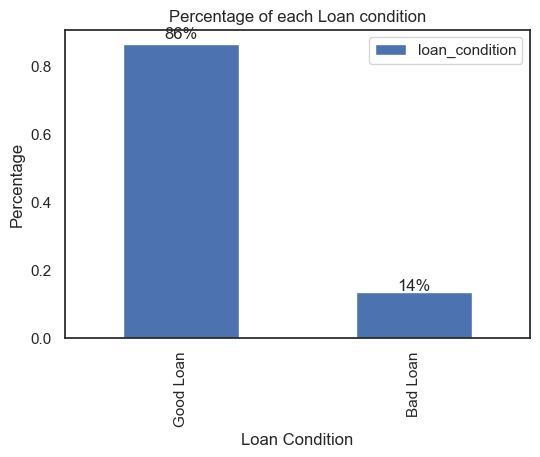

In [104]:
cnt = data['loan_condition'].value_counts().to_frame()
percentage = cnt.div(cnt.sum(0), axis=1)
ac = percentage.plot(kind='bar', figsize=(6, 4), rot=90)

plt.xlabel('Loan Condition')
plt.ylabel('Percentage')
plt.title('Percentage of each Loan condition')

for p in ac.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ac.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [105]:
data.describe()

,id,year,final_d,emp_length_int,annual_inc,loan_amount,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.751284e+07,2.013096e+03,1.049870e+06,5.838361e+00,7.355918e+04,1.404009e+04,1.331131e+01,1.756436e+01,8.372162e+03,5.966388e+03,2.073239e+02,4.280636e+02
std,2.399983e+07,2.462672e+00,4.461523e+04,3.582386e+00,6.254313e+04,8.307116e+03,4.214523e+00,1.620736e+01,8.009555e+03,6.429130e+03,7.753706e+02,2.388619e+02
min,5.473400e+04,2.007000e+03,1.012008e+06,-1.594992e+00,0.000000e+00,5.000000e+02,5.320000e+00,-7.950813e+00,-3.304040e+03,-6.639724e+03,-3.626591e+03,-2.368937e+02
25%,3.056740e+06,2.013000e+03,1.012016e+06,2.000000e+00,4.400000e+04,7.950000e+03,1.016000e+01,1.123000e+01,2.307800e+03,1.349290e+03,0.000000e+00,2.552500e+02
50%,2.230147e+07,2.014000e+03,1.022010e+06,6.000000e+00,6.228200e+04,1.200000e+04,1.299000e+01,1.719000e+01,5.937030e+03,3.729750e+03,0.000000e+00,3.789500e+02
75%,5.058081e+07,2.015000e+03,1.092015e+06,1.000000e+01,8.900000e+04,1.990000e+04,1.611975e+01,2.346000e+01,1.197099e+04,8.483040e+03,0.000000e+00,5.632300e+02
max,6.861706e+07,2.015000e+03,1.122015e+06,1.305684e+01,9.500000e+06,3.500000e+04,2.899000e+01,9.999000e+03,5.777758e+04,3.500003e+04,3.352027e+04,1.445460e+03


## II. Modeling

In [106]:
## Remove unnecessary columns
data.drop(columns = ['id', 'issue_d', 'final_d','year'], inplace = True)

### Identify the target variable

In [107]:
data['Default']=data['loan_condition'].replace(['Good Loan','Bad Loan'],[0,1])
data.drop(columns = ['loan_condition'], inplace = True)

### Split data

In [108]:
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
X = data.drop('Default', axis = 1)
y = data['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# specifically hard copying the training sets 
X_train, X_test = X_train.copy(), X_test.copy()

### Feature selection

In [109]:
# first divide training data into categorical and numerical subsets
X_train_num = X_train.select_dtypes(['float', 'int']).columns
X_train_cat = X_train.select_dtypes(['object']).columns

<Axes: >

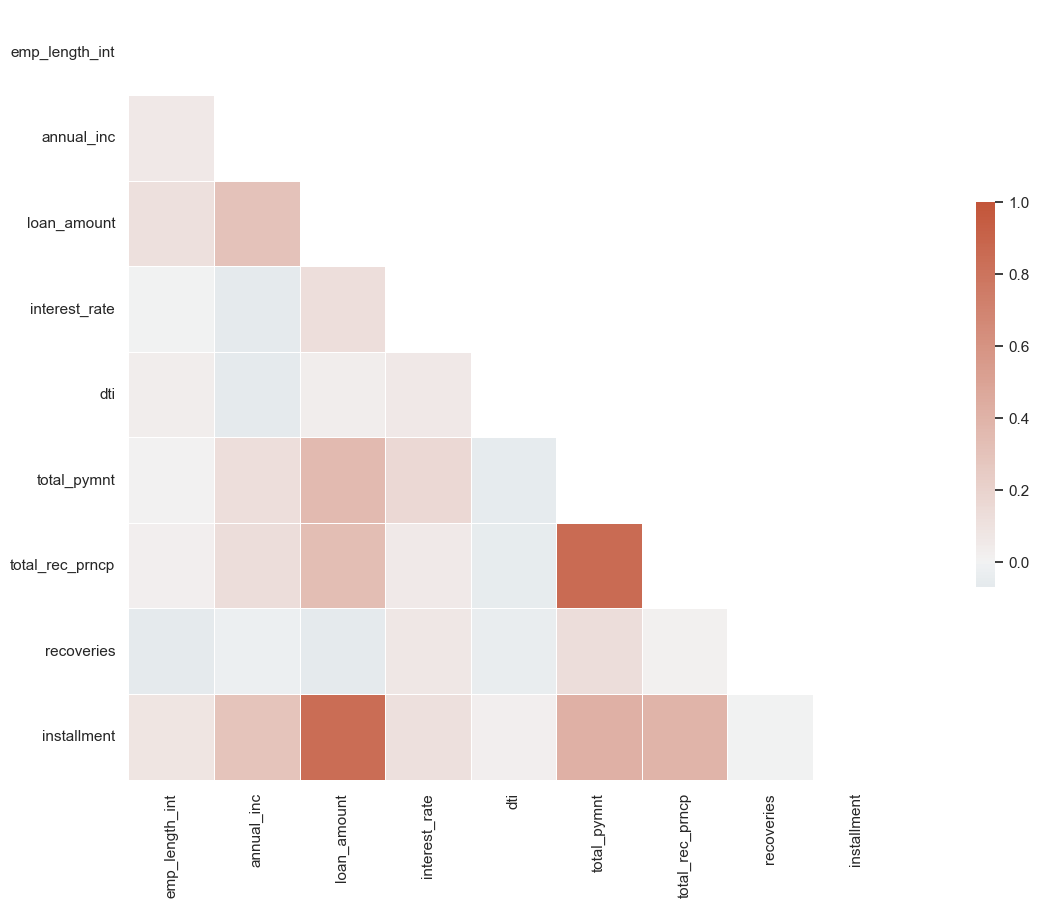

In [110]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = X_train.select_dtypes(['float', 'int']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

No features would be dropped because of no multicollinearity among them.

## 1. WoE Binning/Feature Engineering 

### Weight of Evidence (WOE) and Information Value (IV) EXPLAINED
**WOE (weight of evidence)** is one of the feature engineering and feature selection techniques commonly applied in scorecard models. This method will rank variables into strong, medium, weak, non-iprocaliative, etc. based on the predictive power of an independent variable in relation to the dependent variable. The ranking standard will be the information value index IV (Information Value) calculated from the WOE method. At the same time, the model also creates features values for each variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad. In this case, "Good" or 1 refers to records is bad debt, and "Bad" or 0 refers to records which is not bad debt.
<p style="text-align: center;">WOE = ln(% of Good / % of Bad)</p>

Weight of Evidence (WOE) helps to transform a continuous independent variable into a set of groups or bins based on similarity of dependent variable distribution i.e. number of events and non-events. 
- For continuous independent variables : First, create bins (categories / groups) for a continuous independent variable and then combine categories with similar WOE values and replace categories with WOE values. Use WOE values rather than input values in your model.
- For categorical independent variables : Combine categories with similar WOE and then create new categories of an independent variable with continuous WOE values. In other words, use WOE values rather than raw categories in your model. The transformed variable will be a continuous variable with WOE values. It is same as any continuous variable.

**Information value (IV)** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula:
<p style="text-align: center;">IV = ∑ (% of Good - % of Bad) * WOE</p>

| Information Value | Variable Predictiveness |
|---|---|
| Less than 0.02 | Not useful for prediction |
| 0.02 to 0.1 | Weak predictive Power |
| 0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power| 

We will visualize the distribution of variables to understand their distribution first.

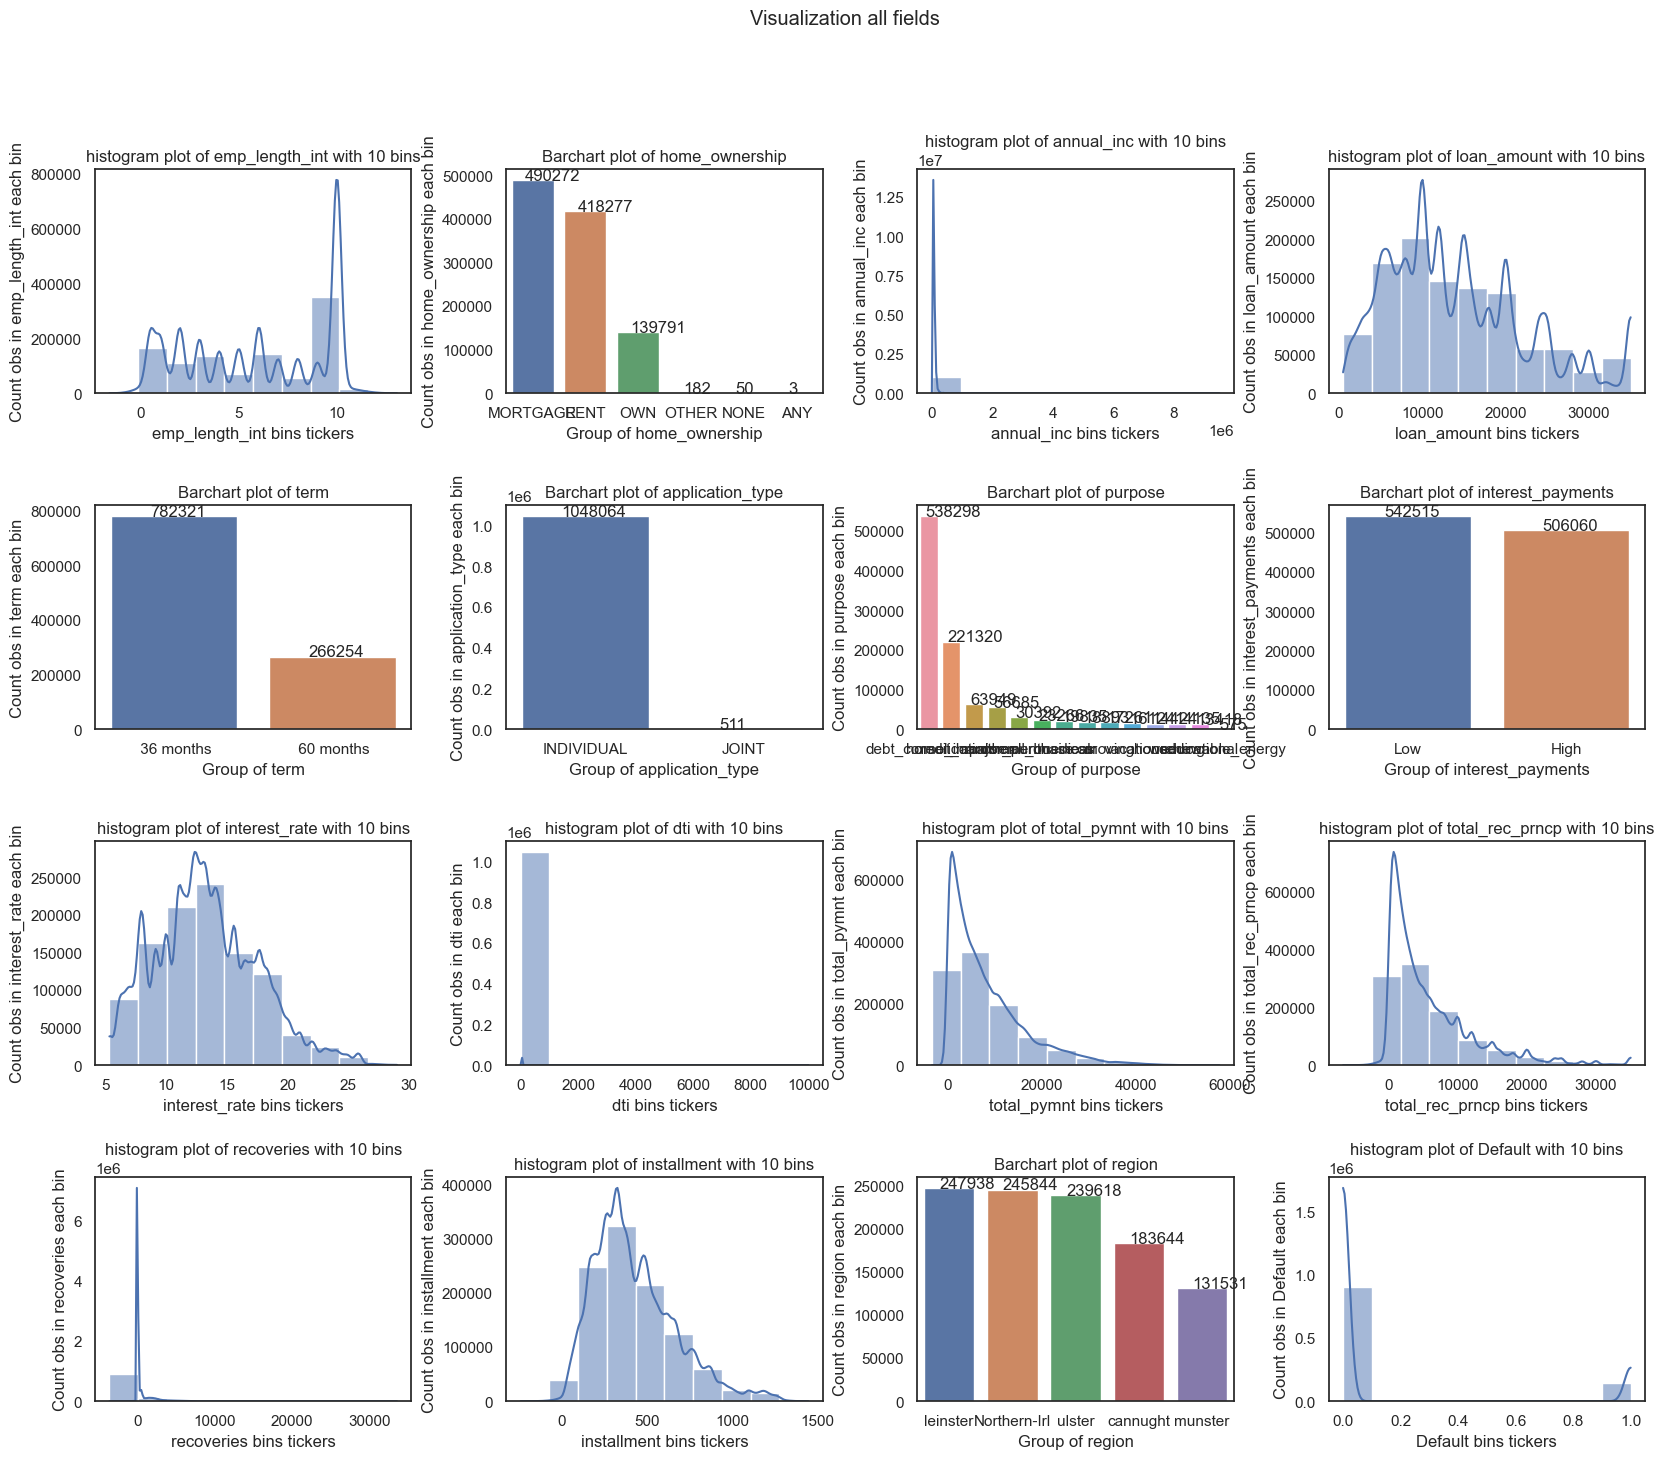

In [111]:
# Biểu đồ histogram
def _plot_hist_subplot(x, fieldname, bins = 10, use_kde = True):
    x = x.dropna()
    xlabel = '{} bins tickers'.format(fieldname)
    ylabel = 'Count obs in {} each bin'.format(fieldname)
    title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
    ax = sns.histplot(x, bins = bins, kde = use_kde)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax

# Biểu đồ barchart
def _plot_barchart_subplot(x, fieldname):
    xlabel = 'Group of {}'.format(fieldname)
    ylabel = 'Count obs in {} each bin'.format(fieldname)
    title = 'Barchart plot of {}'.format(fieldname)
    x = x.fillna('Missing')
    df_summary = x.value_counts(dropna = False)
    y_values = df_summary.values
    x_index = df_summary.index
    ax = sns.barplot(x = x_index, y = y_values, order = x_index)
    # Tạo vòng for lấy tọa độ đỉnh trên cùng của biểu đồ và thêm label thông qua annotate.
    labels = list(set(x))
    for label, p in zip(y_values, ax.patches):
        ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return ax

# Khởi tạo figure cho đồ thị (Kích thước W*H = 16x12) và cách nhau là 0.2 giữa các đồ thị
fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
# Tạo vòng for check định dạng của biến và visualize
for i, (fieldname, dtype) in enumerate(zip(data.columns, data.dtypes.values)):
    if i <= 15:
        ax_i = fig.add_subplot(4, 4, i+1)
        if dtype in ['float64', 'int64']:
            ax_i = _plot_hist_subplot(data[fieldname], fieldname=fieldname)
        else:
            ax_i = _plot_barchart_subplot(data[fieldname], fieldname=fieldname)
      
fig.suptitle('Visualization all fields')
plt.show()

### Calculate WOE for each variable

**_bin_table()** function below will divide bins each variables and statistics the number of observations, the number of defaults in each group.

In [112]:
MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

def _bin_table(data, colname, n_bins = 10, qcut = None):
    X = data[[colname, 'Default']]
    X = X.sort_values(colname)
    coltype = X[colname].dtype

    if coltype in ['float', 'int']:
        if qcut is None:
            try:
                bins, thres = pd.qcut(X[colname], q = n_bins, retbins=True)
                thres[0] = MIN_VAL
                thres[-1] = MAX_VAL
                bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
                X['bins'] = bins
            except:
                print('n_bins must be lower to bin interval is valid!')
        else:
            bins, thres = pd.cut(X[colname], bins=qcut, retbins=True)
            X['bins'] = bins
    elif coltype == 'object':
        X['bins'] = X[colname]

    df_GB = pd.pivot_table(X, 
                index = ['bins'],
                values = ['Default'],
                columns = ['Default'],
                aggfunc = {
                    'Default':np.size
                })

    df_Count = pd.pivot_table(X, 
                index = ['bins'],
                values = ['Default'],
                aggfunc = {
                    'Default': np.size
                })
  
    if coltype in ['float', 'int']:
        df_Thres = pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)
    elif coltype == 'object':
        df_Thres = pd.DataFrame(index=df_GB.index)
        thres = None
    df_Count.columns = ['No_Obs']
    df_GB.columns = ['#BAD', '#GOOD']
    df_summary = df_Thres.join(df_Count).join(df_GB)
    return df_summary, thres

**_WOE()** function calculates the weights of evidence at each bins and the information value for each variable. In case a bin has a smaller number of observations than a minimum threshold, we will add it to the previous bin.

In [113]:
def _WOE(data, colname, n_bins = None, min_obs = 100, qcut = None):
    df_summary, thres = _bin_table(data, colname, n_bins = n_bins, qcut = qcut)
    df_summary['#BAD'] = df_summary['#BAD'].replace({0:1})
  
    if qcut is not None:
        exclude_ind = np.where(df_summary['No_Obs'] <= min_obs)[0]
        if exclude_ind.shape[0] > 0:
            new_thres = np.delete(thres, exclude_ind)
            print('Auto combine {} bins into {} bins'.format(n_bins, new_thres.shape[0]-1))
            df_summary, thres = _bin_table(data, colname, qcut=new_thres)
  
    new_thres = thres
    df_summary['GOOD/BAD'] = df_summary['#GOOD']/df_summary['#BAD']
    df_summary['%BAD'] = df_summary['#BAD']/df_summary['#BAD'].sum()
    df_summary['%GOOD'] = df_summary['#GOOD']/df_summary['#GOOD'].sum()
    df_summary['WOE'] = np.log(df_summary['%GOOD']/df_summary['%BAD'])
    df_summary['IV'] = (df_summary['%GOOD']-df_summary['%BAD'])*df_summary['WOE']
    df_summary['COLUMN'] = colname
    IV = df_summary['IV'].sum()
    print('Information Value of {} column: {}'.format(colname, IV))
    return df_summary, IV, new_thres

In [114]:
def _plot(df_summary):
    colname = list(df_summary['COLUMN'].unique())[0]
    df_summary['WOE'].plot(linestyle='-', marker='o')
    plt.title('WOE of {} field'.format(colname))
    plt.axhline(y=0, color = 'red')
    plt.xticks(rotation=45)
    plt.ylabel('WOE')
    plt.xlabel('Bin group')

In [115]:
data_train = pd.concat([X_train, y_train], axis=1)

We will analyze both categorical and numerical features based on their categorical/binned WoEs and IVs and then combine some of these binned categories together through a custom Python Class with fit_transform method.

The columns shown in tables each feature have the following meanings:
- No observation: The number of observations in each bins. Each category (bin) should have at least 5% of the observations. Often will be divided equally between bins so that there is no bias.
- No Good: The number of records is bad debt in each bins. We consider default records as Good because Good does not represent the quality of the records but merely marks the label records as 1.
- No Bad: The number of records is not bad debt in each bins. The label of the profile is 0.
- Good/Bad: The percentage of Good/Bad records per bins.
- %Good: Distribution of good across all bins.
- %Bad: Distribution of bad across all bins.
- WOE (Weight of Evidence): Measure the difference between %Good and %Bad per bin.
- IV (Information Value): Information value index, which has the effect of evaluating whether a variable has the power in classifying bad debts or not.

Then perform the WOE transformation after binning. We would check correct binning with WOE that the WOE should be monotonic i.e. either growing or decreasing with the bins. 

### Analyze WoEs and IVs of numeric features

#### emp_length_int

Information Value of emp_length_int column: 0.16517762203159375


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 1.504]",1.503787e+00,139810,113883,25927,0.227663,0.157115,0.227386,0.369670,0.025977,emp_length_int
"(1.504, 3.0]",3.000000e+00,140406,121412,18994,0.156443,0.167502,0.166582,-0.005510,0.000005,emp_length_int
"(3.0, 6.0]",6.000000e+00,144797,123574,21223,0.171743,0.170485,0.186131,0.087802,0.001374,emp_length_int
"(6.0, 9.0]",9.000000e+00,152599,133451,19148,0.143483,0.184111,0.167933,-0.091979,0.001488,emp_length_int
"(9.0, 10.0]",1.000000e+01,246317,224378,21939,0.097777,0.309556,0.192410,-0.475509,0.055704,emp_length_int
"(10.0, 999999999.0]",1.000000e+09,14931,8140,6791,0.834275,0.011230,0.059559,1.668365,0.080630,emp_length_int


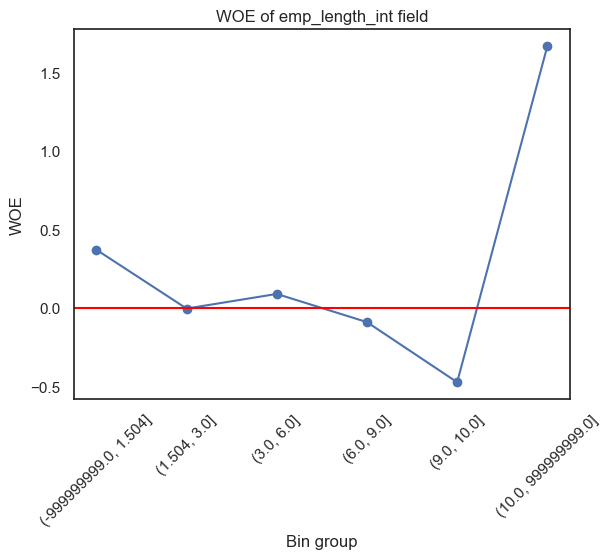

In [32]:
emp_length_int, IV, thres = _WOE(data_train, 'emp_length_int', n_bins = 6, min_obs= 100)
display(emp_length_int)
_plot(emp_length_int)

#### annual_inc

Information Value of annual_inc column: 0.07334779641743257


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 32000.0]",32000.0,88157,69534,18623,0.267826,0.095930,0.163328,0.532138,0.035865,annual_inc
"(32000.0, 40000.0]",40000.0,90832,74209,16623,0.224002,0.102380,0.145788,0.353459,0.015343,annual_inc
"(40000.0, 48000.0]",48000.0,78434,68546,9888,0.144253,0.094567,0.086720,-0.086626,0.000680,annual_inc
"(48000.0, 55000.0]",55000.0,89922,78630,11292,0.143609,0.108479,0.099034,-0.091102,0.000861,annual_inc
"(55000.0, 62200.0]",62200.0,72090,62675,9415,0.150219,0.086468,0.082572,-0.046102,0.000180,annual_inc
"(62200.0, 71600.0]",71600.0,84336,74255,10081,0.135762,0.102444,0.088413,-0.147296,0.002067,annual_inc
"(71600.0, 82000.0]",82000.0,85156,75168,9988,0.132876,0.103703,0.087597,-0.168784,0.002718,annual_inc
"(82000.0, 96524.2]",96524.2,82161,71801,10360,0.144288,0.099058,0.090860,-0.086389,0.000708,annual_inc
"(96524.2, 122500.0]",122500.0,83911,75369,8542,0.113336,0.103980,0.074915,-0.327844,0.009529,annual_inc


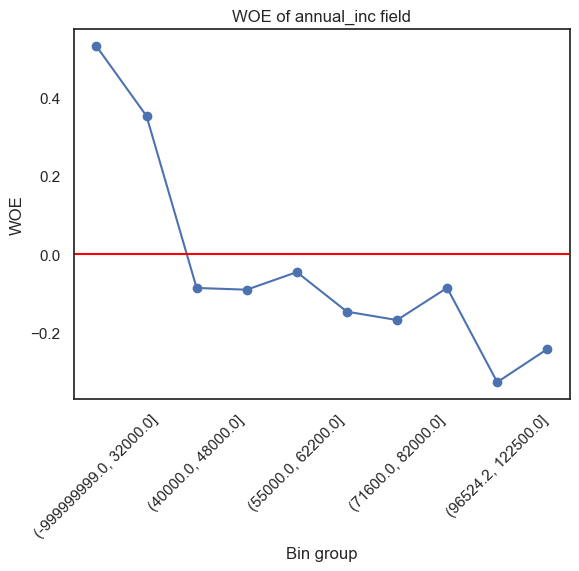

In [30]:
df_annual_inc, IV, thres = _WOE(data_train, 'annual_inc', n_bins = 10, min_obs= 100)
display(df_annual_inc)
_plot(df_annual_inc)

#### loan_amount

Information Value of loan_amount column: 0.0702988317114473


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 4650.0]",4650.0,84515,66744,17771,0.266256,0.092081,0.155856,0.526260,0.033562,loan_amount
"(4650.0, 6500.0]",6500.0,85498,73469,12029,0.163729,0.101359,0.105497,0.040014,0.000166,loan_amount
"(6500.0, 8800.0]",8800.0,81906,69966,11940,0.170654,0.096526,0.104717,0.081441,0.000667,loan_amount
"(8800.0, 10000.0]",10000.0,84808,74868,9940,0.132767,0.103289,0.087176,-0.169603,0.002733,loan_amount
"(10000.0, 12000.0]",12000.0,89211,76073,13138,0.172703,0.104952,0.115223,0.093372,0.000959,loan_amount
"(12000.0, 15000.0]",15000.0,102549,88960,13589,0.152754,0.122731,0.119179,-0.029369,0.000104,loan_amount
"(15000.0, 18000.0]",18000.0,77000,66210,10790,0.162966,0.091345,0.094631,0.035345,0.000116,loan_amount
"(18000.0, 20375.0]",20375.0,65660,57258,8402,0.146739,0.078994,0.073688,-0.069541,0.000369,loan_amount
"(20375.0, 25000.0]",25000.0,84795,74962,9833,0.131173,0.103419,0.086238,-0.181680,0.003121,loan_amount


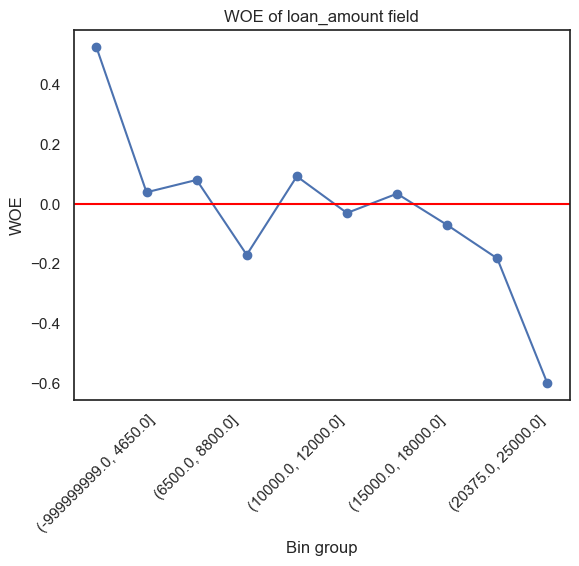

In [33]:
loan_amount, IV, thres = _WOE(data_train, 'loan_amount', n_bins = 10, min_obs= 100)
display(loan_amount)
_plot(loan_amount)

#### interest_rate

Information Value of interest_rate column: 0.3102037646422299


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 7.89]",7.890000e+00,92009,90121,1888,0.020950,0.124333,0.016558,-2.016078,2.172816e-01,interest_rate
"(7.89, 9.49]",9.490000e+00,76698,71247,5451,0.076508,0.098294,0.047807,-0.720797,3.639096e-02,interest_rate
"(9.49, 10.99]",1.099000e+01,92804,80636,12168,0.150900,0.111247,0.106716,-0.041579,1.883805e-04,interest_rate
"(10.99, 12.12]",1.212000e+01,80344,66656,13688,0.205353,0.091960,0.120047,0.266531,7.486103e-03,interest_rate
"(12.12, 12.99]",1.299000e+01,83114,71596,11518,0.160875,0.098775,0.101016,0.022429,5.024944e-05,interest_rate
"(12.99, 13.99]",1.399000e+01,87421,75533,11888,0.157388,0.104207,0.104261,0.000517,2.781855e-08,interest_rate
"(13.99, 15.31]",1.531000e+01,75644,63762,11882,0.186349,0.087967,0.104208,0.169424,2.751568e-03,interest_rate
"(15.31, 16.99]",1.699000e+01,88681,74662,14019,0.187766,0.103005,0.122950,0.176999,3.530224e-03,interest_rate
"(16.99, 18.85]",1.885000e+01,78389,64127,14262,0.222402,0.088471,0.125081,0.346290,1.267779e-02,interest_rate


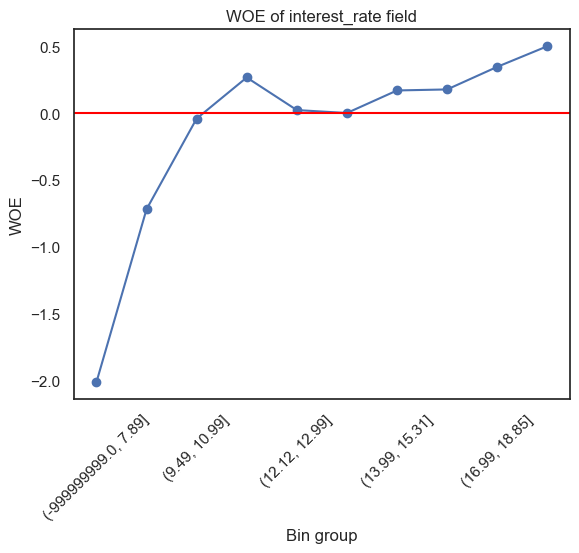

In [34]:
interest_rate, IV, thres = _WOE(data_train, 'interest_rate', n_bins = 10, min_obs= 100)
display(interest_rate)
_plot(interest_rate)

#### dti

Information Value of dti column: 0.037954499393750424


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 6.628]",6.627513e+00,83887,67345,16542,0.245631,0.092910,0.145077,0.445631,0.023247,dti
"(6.628, 9.87]",9.870000e+00,83986,71736,12250,0.170765,0.098968,0.107435,0.082090,0.000695,dti
"(9.87, 12.5]",1.250000e+01,83791,73067,10724,0.146769,0.100805,0.094052,-0.069336,0.000468,dti
"(12.5, 14.88]",1.488000e+01,84147,73918,10229,0.138383,0.101979,0.089711,-0.128173,0.001572,dti
"(14.88, 17.2]",1.720000e+01,83838,73359,10479,0.142845,0.101207,0.091903,-0.096435,0.000897,dti
"(17.2, 19.547]",1.954691e+01,83667,72600,11067,0.152438,0.100160,0.097060,-0.031440,0.000097,dti
"(19.547, 22.07]",2.207000e+01,83965,72487,11478,0.158346,0.100004,0.100665,0.006582,0.000004,dti
"(22.07, 25.0]",2.500000e+01,83937,72109,11828,0.164029,0.099483,0.103734,0.041848,0.000178,dti
"(25.0, 29.02]",2.902000e+01,83762,72720,11042,0.151843,0.100326,0.096841,-0.035353,0.000123,dti


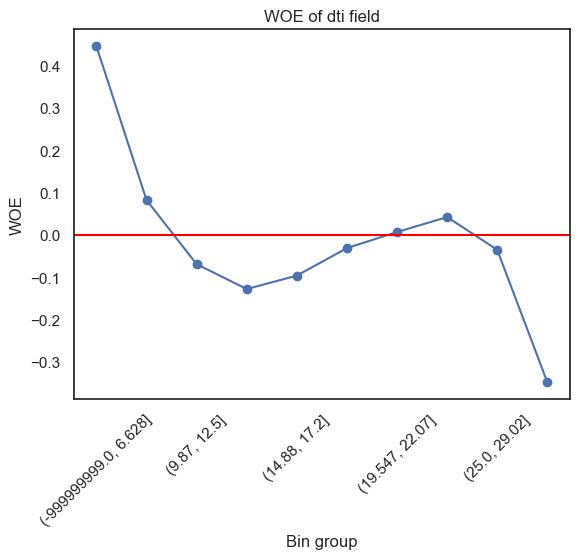

In [54]:
dti, IV, thres = _WOE(data_train, 'dti', n_bins = 10, min_obs= 100)
display(dti)
_plot(dti)

#### total_pymnt

Information Value of total_pymnt column: 0.18701656069700792


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 813.97]",8.139700e+02,83887,79995,3892,0.048653,0.110363,0.034134,-1.173484,0.089453,total_pymnt
"(813.97, 1770.346]",1.770346e+03,83885,77599,6286,0.081006,0.107057,0.055130,-0.663673,0.034463,total_pymnt
"(1770.346, 2901.76]",2.901760e+03,83901,75500,8401,0.111272,0.104161,0.073679,-0.346225,0.010554,total_pymnt
"(2901.76, 4282.79]",4.282790e+03,83874,73534,10340,0.140615,0.101449,0.090684,-0.112171,0.001207,total_pymnt
"(4282.79, 5941.01]",5.941010e+03,83883,71528,12355,0.172730,0.098681,0.108356,0.093529,0.000905,total_pymnt
"(5941.01, 7925.332]",7.925332e+03,83886,69754,14132,0.202598,0.096234,0.123941,0.253024,0.007011,total_pymnt
"(7925.332, 10498.543]",1.049854e+04,83886,68091,15795,0.231969,0.093940,0.138526,0.388405,0.017318,total_pymnt
"(10498.543, 13752.49]",1.375249e+04,83887,68531,15356,0.224074,0.094547,0.134676,0.353777,0.014197,total_pymnt
"(13752.49, 19679.262]",1.967926e+04,83885,69178,14707,0.212596,0.095439,0.128984,0.301197,0.010104,total_pymnt


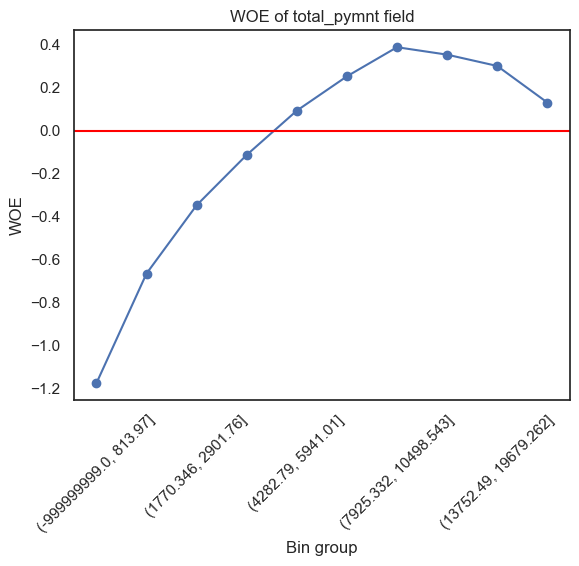

In [52]:
total_pymnt, IV, thres = _WOE(data_train, 'total_pymnt', n_bins = 10, min_obs= 100)
display(total_pymnt)
_plot(total_pymnt)

#### total_rec_prncp

Information Value of total_rec_prncp column: 0.0993685681781528


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 311.65]",3.116500e+02,59921,52578,7343,0.139659,0.072538,0.064400,-0.118994,0.000968,total_rec_prncp
"(311.65, 693.4]",6.934000e+02,59925,54218,5707,0.105260,0.074800,0.050052,-0.401763,0.009943,total_rec_prncp
"(693.4, 1109.745]",1.109745e+03,59910,53309,6601,0.123825,0.073546,0.057892,-0.239327,0.003746,total_rec_prncp
"(1109.745, 1598.07]",1.598070e+03,59921,52605,7316,0.139074,0.072575,0.064163,-0.123191,0.001036,total_rec_prncp
"(1598.07, 2182.21]",2.182210e+03,59919,51927,7992,0.153908,0.071639,0.070092,-0.021841,0.000034,total_rec_prncp
"(2182.21, 2892.2]",2.892200e+03,59926,51376,8550,0.166420,0.070879,0.074986,0.056317,0.000231,total_rec_prncp
"(2892.2, 3730.283]",3.730283e+03,59908,51191,8717,0.170284,0.070624,0.076450,0.079268,0.000462,total_rec_prncp
"(3730.283, 4822.85]",4.822850e+03,59919,50112,9807,0.195702,0.069135,0.086010,0.218393,0.003685,total_rec_prncp
"(4822.85, 6000.0]",6.000000e+03,60600,51185,9415,0.183941,0.070616,0.082572,0.156414,0.001870,total_rec_prncp


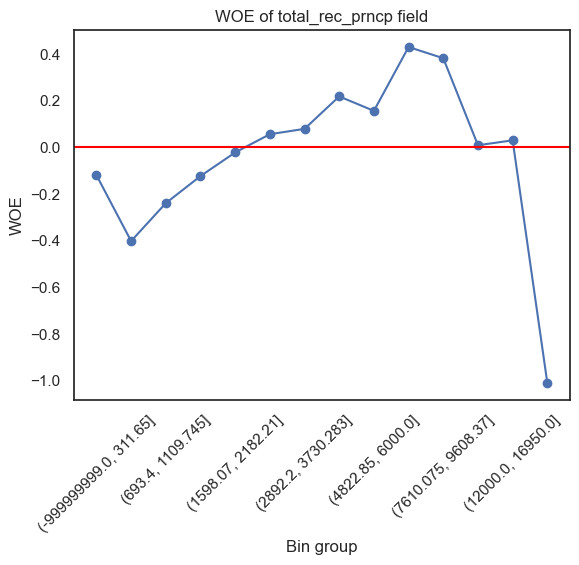

In [62]:
total_rec_prncp, IV, thres = _WOE(data_train, 'total_rec_prncp', n_bins = 14, min_obs= 100)
display(total_rec_prncp)
_plot(total_rec_prncp)

#### recoveries

Information Value of recoveries column: 1.6674365488974359


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 0.0]",0.0,704430,663824,40606,0.061170,0.915825,0.356124,-0.944546,0.528663,recoveries
"(0.0, 999999999.0]",999999999.0,134429,61013,73416,1.203285,0.084175,0.643876,2.034610,1.138773,recoveries


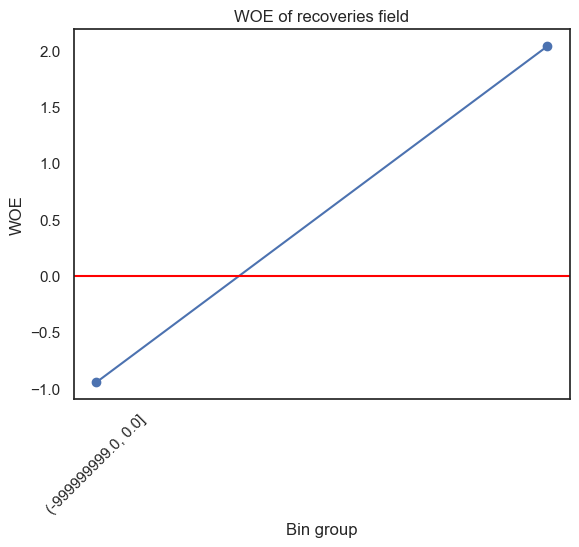

In [133]:
recoveries, IV, thres = _WOE(data_train, 'recoveries', n_bins = 2, min_obs= 100)
display(recoveries)
_plot(recoveries)

Discard this feature given the abnormally high IV value.

#### installment

Information Value of installment column: 0.020229181807348964


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 112.92]",1.129200e+02,41981,35037,6944,0.198190,0.048338,0.060901,0.231030,0.002902,installment
"(112.92, 161.72]",1.617200e+02,41963,35911,6052,0.168528,0.049543,0.053077,0.068902,0.000243,installment
"(161.72, 194.03]",1.940300e+02,41989,36449,5540,0.151993,0.050286,0.048587,-0.034363,0.000058,installment
"(194.03, 226.74]",2.267400e+02,41842,35978,5864,0.162988,0.049636,0.051429,0.035481,0.000064,installment
"(226.74, 255.3]",2.553000e+02,42136,36677,5459,0.148840,0.050600,0.047877,-0.055327,0.000151,installment
"(255.3, 280.021]",2.800208e+02,41747,36349,5398,0.148505,0.050148,0.047342,-0.057581,0.000162,installment
"(280.021, 307.08]",3.070800e+02,41947,36122,5825,0.161259,0.049835,0.051087,0.024814,0.000031,installment
"(307.08, 329.48]",3.294800e+02,42016,37141,4875,0.131257,0.051240,0.042755,-0.181045,0.001536,installment
"(329.48, 351.44]",3.514400e+02,41945,36510,5435,0.148863,0.050370,0.047666,-0.055170,0.000149,installment


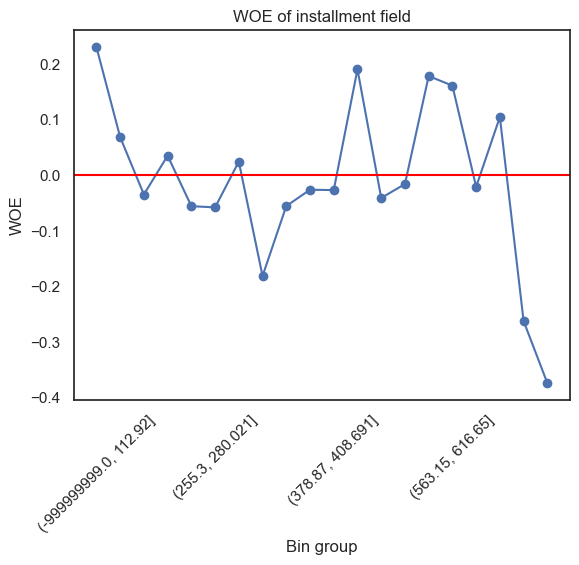

In [70]:
installment, IV, thres = _WOE(data_train, 'installment', n_bins = 20, min_obs= 100)
display(installment)
_plot(installment)

### Analyze WoEs and IVs of discrete features

#### home_ownership

Information Value of home_ownership column: 0.09382006765972227


,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,
ANY,1,1.0,NaN,NaN,0.000001,NaN,NaN,NaN,home_ownership
MORTGAGE,392492,351263.0,41229.0,0.117374,0.484609,0.361588,-0.292837,0.036025,home_ownership
NONE,38,31.0,7.0,0.225806,0.000043,0.000061,0.361480,0.000007,home_ownership
OTHER,145,118.0,27.0,0.228814,0.000163,0.000237,0.374709,0.000028,home_ownership
OWN,111806,87188.0,24618.0,0.282355,0.120286,0.215906,0.584968,0.055934,home_ownership
RENT,334378,286237.0,48141.0,0.168186,0.394898,0.422208,0.066871,0.001826,home_ownership


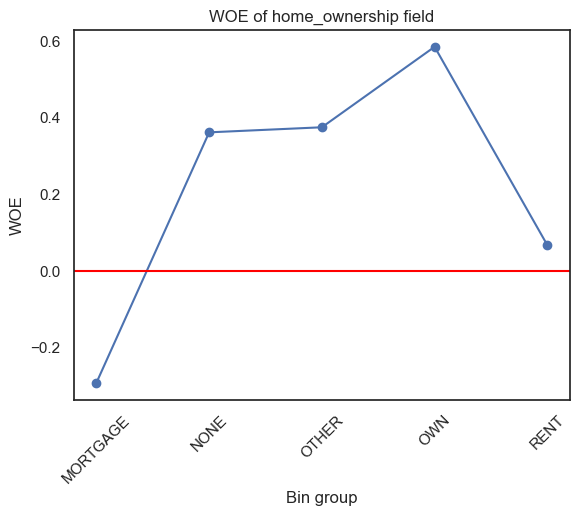

In [71]:
home_ownership, IV, thres = _WOE(data_train, 'home_ownership')
display(home_ownership)
_plot(home_ownership)

#### term

Information Value of term column: 0.053922095344010025


,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,
36 months,625915,531435,94480,0.177783,0.733178,0.828612,0.122364,0.011678,term
60 months,212945,193403,19542,0.101043,0.266822,0.171388,-0.442653,0.042244,term


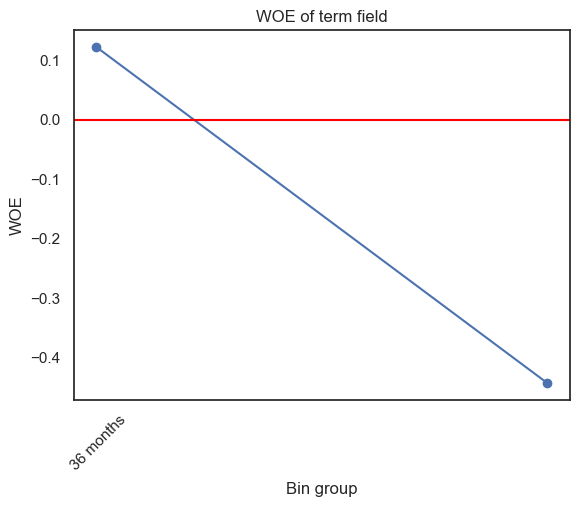

In [72]:
term, IV, thres = _WOE(data_train, 'term')
display(term)
_plot(term)

#### application_type

Information Value of application_type column: 0.0014702787194282225


,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,
INDIVIDUAL,838447,724429,114018,0.15739,0.999436,0.999965,0.000529,2.801187e-07,application_type
JOINT,413,409,4,0.00978,0.000564,0.000035,-2.777864,1.469999e-03,application_type


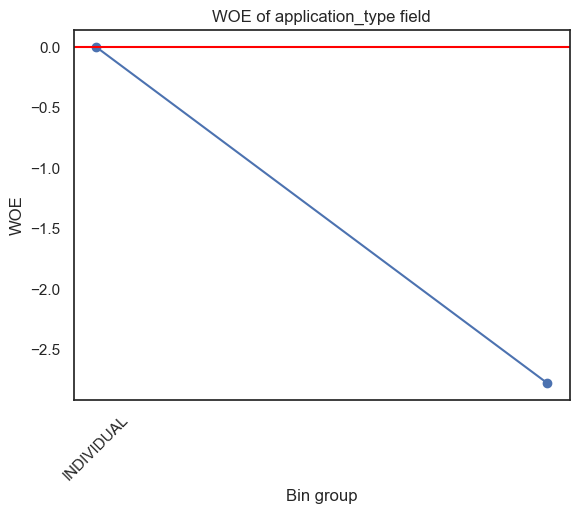

In [73]:
application_type, IV, thres = _WOE(data_train, 'application_type')
display(application_type)
_plot(application_type)

Ignore this feature given the low IV value

#### purpose

Information Value of purpose column: 0.479295042744758


,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,
car,15189,10965,4224,0.385226,0.015128,0.037045,0.895631,0.019630,purpose
credit_card,177045,161978,15067,0.093019,0.223468,0.132141,-0.525397,0.047983,purpose
debt_consolidation,430344,391862,38482,0.098203,0.540620,0.337496,-0.471162,0.095704,purpose
educational,10800,5916,4884,0.825558,0.008162,0.042834,1.657861,0.057481,purpose
home_improvement,51162,43824,7338,0.167442,0.060460,0.064356,0.062441,0.000243,purpose
house,11519,7145,4374,0.612176,0.009857,0.038361,1.358822,0.038731,purpose
major_purchase,24441,18412,6029,0.327449,0.025402,0.052876,0.733135,0.020142,purpose
medical,15835,11041,4794,0.434200,0.015232,0.042045,1.015306,0.027223,purpose
moving,13748,8876,4872,0.548896,0.012245,0.042729,1.249710,0.038095,purpose


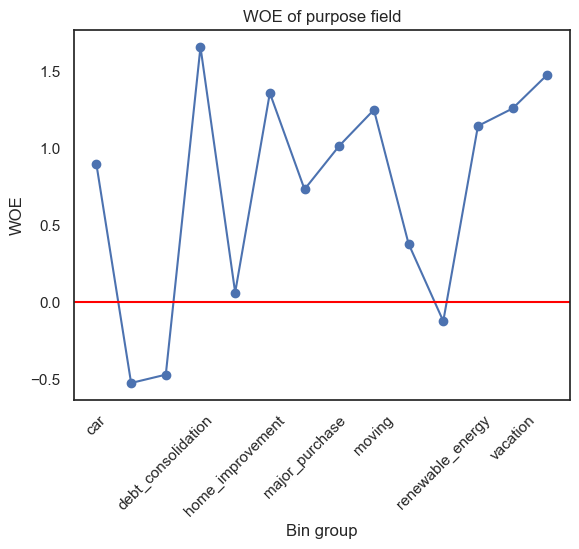

In [74]:
purpose, IV, thres = _WOE(data_train, 'purpose')
display(purpose)
_plot(purpose)

#### interest_payments

Information Value of interest_payments column: 0.09400496963212579


,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,
High,404814,334790,70024,0.209158,0.461883,0.614127,0.284891,0.043373,interest_payments
Low,434046,390048,43998,0.112802,0.538117,0.385873,-0.332569,0.050632,interest_payments


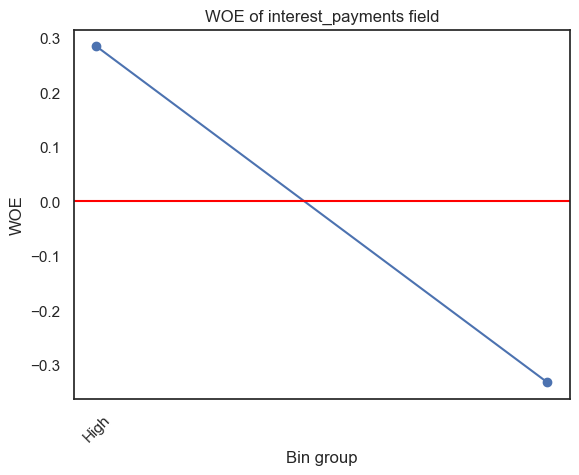

In [75]:
interest_payments, IV, thres = _WOE(data_train, 'interest_payments')
display(interest_payments)
_plot(interest_payments)

#### region

Information Value of region column: 0.00561680333852968


,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,
Northern-Irl,196684,168193,28491,0.169395,0.232042,0.249873,0.074033,0.001320,region
cannught,146932,127651,19281,0.151045,0.176110,0.169099,-0.040623,0.000285,region
leinster,198418,172687,25731,0.149004,0.238242,0.225667,-0.054227,0.000682,region
munster,105070,89092,15978,0.179343,0.122913,0.140131,0.131100,0.002257,region
ulster,191756,167215,24541,0.146763,0.230693,0.215230,-0.069378,0.001073,region


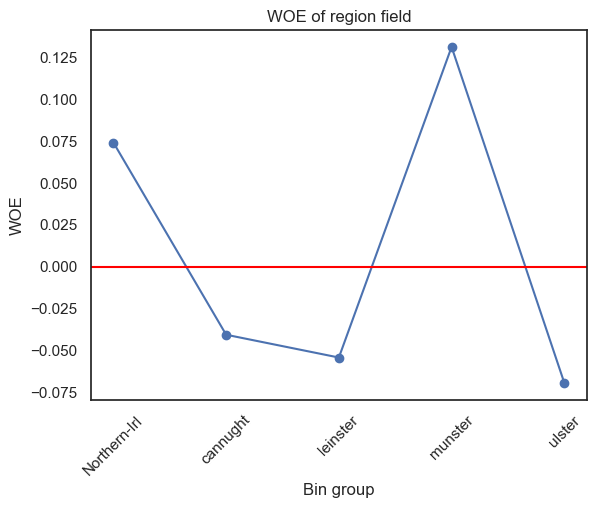

In [76]:
region, IV, thres = _WOE(data_train, 'region')
display(region)
_plot(region)

Ignore this feature given the low IV value

Calculate the information value for all variables.

In [116]:
WOE_dict=dict()
nbins = {'emp_length_int': 6, 'annual_inc':10, 'loan_amount': 10, 'interest_rate':10, 'dti':10, 'total_pymnt': 10, 'total_rec_prncp':14, 'recoveries':2,'installment':20}
for (col, bins) in nbins.items():
    df_summary, IV, thres = _WOE(data_train, colname=col, n_bins=bins)
    WOE_dict[col] = {'table':df_summary, 'IV':IV}

Information Value of emp_length_int column: 0.16517762203159375
Information Value of annual_inc column: 0.07334779641743257
Information Value of loan_amount column: 0.0702988317114473
Information Value of interest_rate column: 0.3102037646422299
Information Value of dti column: 0.037954499393750424
Information Value of total_pymnt column: 0.18701656069700792
Information Value of total_rec_prncp column: 0.0993685681781528
Information Value of recoveries column: 1.66743773801032
Information Value of installment column: 0.020229181807348964


In [117]:
for col in ['home_ownership', 'term','application_type','purpose','interest_payments','region']:
    df_summary, IV, thres = _WOE(data_train, colname=col)
    WOE_dict[col] = {'table':df_summary, 'IV':IV}

Information Value of home_ownership column: 0.09382006765972227
Information Value of term column: 0.053922095344010025
Information Value of application_type column: 0.0014702787194282225
Information Value of purpose column: 0.479295042744758
Information Value of interest_payments column: 0.09400496963212579
Information Value of region column: 0.00561680333852968


### Rank variables by forecast power

In [118]:
columns = []
IVs = []
for col in data_train.columns:
    if col != 'Default':
        columns.append(col)
        IVs.append(WOE_dict[col]['IV'])
df_WOE = pd.DataFrame({'column': columns, 'IV': IVs})

def _rank_IV(iv):
    if iv <= 0.02:
        return 'Useless'
    elif iv <= 0.1:
        return 'Weak'
    elif iv <= 0.3:
        return 'Medium'
    elif iv <= 0.5:
        return 'Strong'
    else:
        return 'suspicious'

df_WOE['rank']=df_WOE['IV'].apply(lambda x: _rank_IV(x))
df_WOE.sort_values('IV',inplace=True, ascending=False,ignore_index=True)
df_WOE

,column,IV,rank
0,recoveries,1.667438,suspicious
1,purpose,0.479295,Strong
2,interest_rate,0.310204,Strong
3,total_pymnt,0.187017,Medium
4,emp_length_int,0.165178,Medium
5,total_rec_prncp,0.099369,Weak
6,interest_payments,0.094005,Weak
7,home_ownership,0.093820,Weak
8,annual_inc,0.073348,Weak
9,loan_amount,0.070299,Weak


Thus, in the above variables, the variable 'region','application_type' has no effect in classifying default. The remaining variables all have the effect of partially supporting the classification of records. In which the most powerful variables are 'recoveries','purpose','interest_rate'. Next 'total_pymnt', 'emp_length_int' are variables of medium effects. The remaining variables also have classification but weaker. 'recoveries' is a variable with a very large correlation to the classification, so we need to review the value of the variable.

## 2. Logistic regression
The logistic regression in credit scorecard will not regress directly on the original variables but instead the WOE value in each variable will be used instead as input. We will calculate WOE variables by mapping each bin interval corresponding to its WOE value as follows:

In [119]:
data_test = pd.concat([X_test, y_test], axis=1)
for key in ['region','application_type']:
    WOE_dict.pop(key, None)

In [120]:
data_train.drop(['region','application_type'], axis=1, inplace=True)
data_test.drop(['region','application_type'], axis=1, inplace=True)

In [123]:
for col in WOE_dict.keys():
    try:
        key = list(WOE_dict[col]['table']['WOE'].index)
        woe = list(WOE_dict[col]['table']['WOE'])
        d = dict(zip(key, woe))
        col_woe = col+'_WOE'
        data_train[col_woe] = data_train[col].map(d)
        data_test[col_woe] = data_test[col].map(d)
    except:
        print(col)
data_train.dropna(inplace=True)
data_test.dropna(inplace=True)

In [124]:
Xwoe_train = data_train.filter(like='_WOE', axis = 1)
Xwoe_test = data_test.filter(like='_WOE', axis = 1)
yn_train = data_train['Default']
yn_test = data_test['Default']
print('X_train shape: ', Xwoe_train.shape)
print('X_test shape: ', Xwoe_test.shape)
print('y_train shape: ', yn_train.shape)
print('y_test shape: ', yn_test.shape)

X_train shape:  (838859, 13)
X_test shape:  (209713, 13)
y_train shape:  (838859,)
y_test shape:  (209713,)


Logistic regression with input variables WOE.

In [125]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver = 'lbfgs', max_iter=1000, fit_intercept=True, tol=0.0001, C=1, penalty='l2')
logit_model.fit(Xwoe_train, yn_train)

LogisticRegression(C=1, max_iter=1000)

Forecast and check accuracy on train/test

In [126]:
from sklearn.metrics import accuracy_score

y_pred_train = logit_model.predict(Xwoe_train)
acc_train = accuracy_score(y_pred_train, yn_train)
y_pred_test = logit_model.predict(Xwoe_test)
acc_test = accuracy_score(y_pred_test, yn_test)

print('accuracy on train: ', acc_train)
print('accuracy on test: ', acc_test)

accuracy on train:  0.877723193051514
accuracy on test:  0.8783766385488739


## III. Evaluation

### ROC curve on the test set

/var/folders/j_/zbhtrxhj7qg8g5tggww90rdh0000gn/T/ipykernel_1107/2417265284.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
/var/folders/j_/zbhtrxhj7qg8g5tggww90rdh0000gn/T/ipykernel_1107/2417265284.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


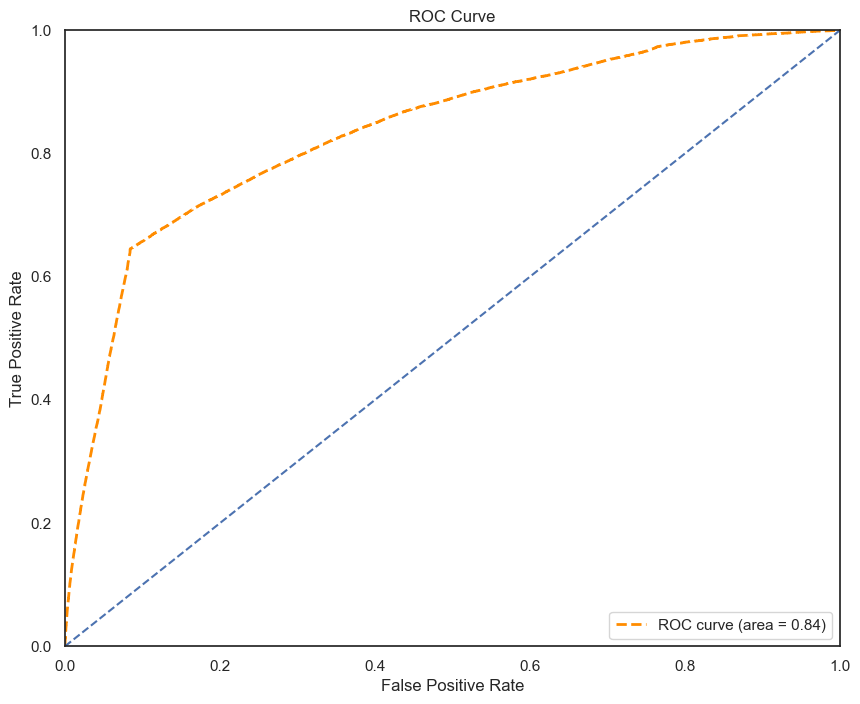

In [127]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = logit_model.predict_proba(Xwoe_test)[:, 1]
fpr, tpr, thres = roc_curve(yn_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

The AUC (area under curve) index that measures the area below the ROC curve indicates whether  the logistic regression model is strong or weak. AUC ∈ [0,1], the greater its value, the better the model. 

For this logistic regression model, AUC = 0.84 is quite high, showing that the forecastability of the model is good and can be applied to practice.

### Precision and recall curves on the test set

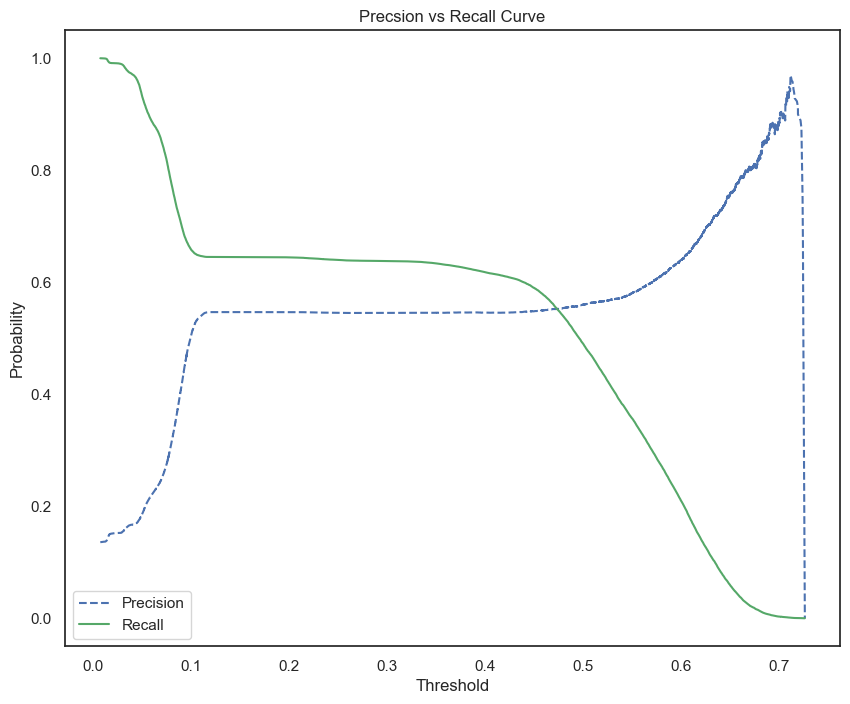

In [128]:
from sklearn.metrics import precision_recall_curve
precision, recall, thres = precision_recall_curve(yn_test, y_pred_prob_test)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(precision, recall, thres)

### Kolmogorov-Smirnov accreditation:
This is a test that measures the difference in distribution between GOOD and BAD according to threshold ratios. If the model has good classification, the cumulative distribution function between GOOD and BAD must have a large separation. On the contrary, if the model is very weak and its forecast results are equal to a random selection. Then the cumulative probability distribution line of GOOD and BAD will be close together and approach the 45-degree diagonal. The Kolmogorov-Smirnov test will test the Ho hypothesis that the two probability distributions GOOD and BAD have no difference. When P-value < 0.05 rejects the Ho hypothesis.

Calculate the cumulative probability distribution of defaults:

In [129]:
def _KM(y_pred, n_bins):
    _, thresholds = pd.qcut(y_pred, q=n_bins, retbins=True)
    cmd_BAD = []
    cmd_GOOD = []
    BAD_id = set(np.where(yn_test == 0)[0])
    GOOD_id = set(np.where(yn_test == 1)[0])
    total_BAD = len(BAD_id)
    total_GOOD = len(GOOD_id)
    for thres in thresholds:
        pred_id = set(np.where(y_pred <= thres)[0])
        # Đếm % số lượng hồ sơ BAD có xác suất dự báo nhỏ hơn hoặc bằng thres
        per_BAD = len(pred_id.intersection(BAD_id))/total_BAD
        cmd_BAD.append(per_BAD)
        # Đếm % số lượng hồ sơ GOOD có xác suất dự báo nhỏ hơn hoặc bằng thres
        per_GOOD = len(pred_id.intersection(GOOD_id))/total_GOOD
        cmd_GOOD.append(per_GOOD)
    cmd_BAD = np.array(cmd_BAD)
    cmd_GOOD = np.array(cmd_GOOD)
    return cmd_BAD, cmd_GOOD, thresholds

cmd_BAD, cmd_GOOD, thresholds = _KM(y_pred_prob_test, n_bins=20)

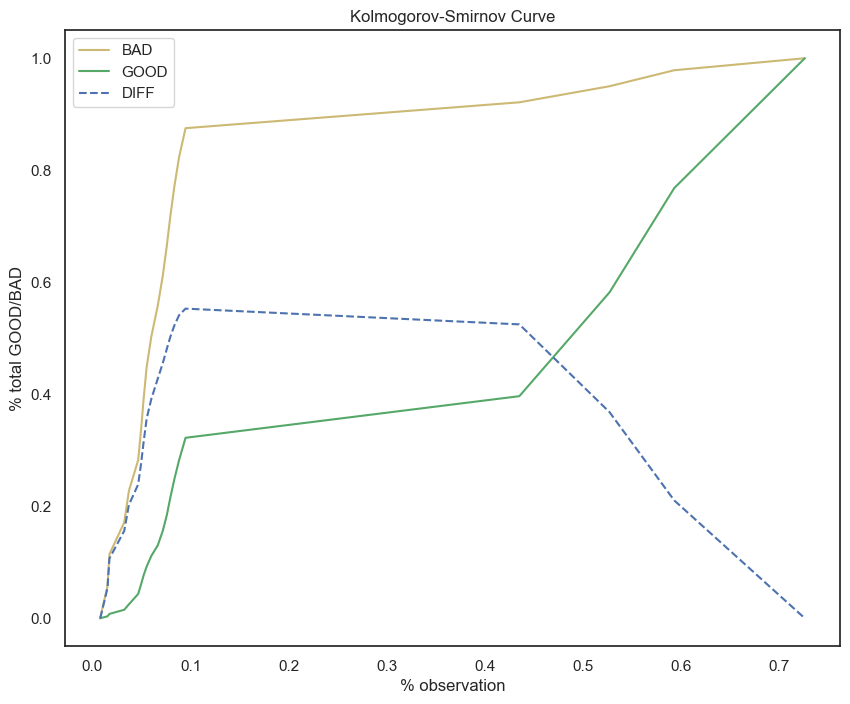

In [147]:
def _plot_KM(cmd_BAD, cmd_GOOD, thresholds):
    plt.figure(figsize = (10, 8))
    plt.plot(thresholds, cmd_BAD, 'y-', label = 'BAD')
    plt.plot(thresholds, cmd_GOOD, 'g-', label = 'GOOD')
    plt.plot(thresholds, cmd_BAD-cmd_GOOD, 'b--', label = 'DIFF')
    plt.xlabel('% observation')
    plt.ylabel('% total GOOD/BAD')
    plt.title('Kolmogorov-Smirnov Curve')
    plt.legend()

_plot_KM(cmd_BAD, cmd_GOOD, thresholds)

Kolmogorov-Smirnov test:

In [130]:
from scipy import stats

stats.ks_2samp(cmd_BAD, cmd_GOOD)

KstestResult(statistic=0.5238095238095238, pvalue=0.005467427576534314, statistic_location=0.3222592527626732, statistic_sign=-1)

p-value < 0.05 shows that the cumulative distribution between the ratio of default or not is different. Therefore, the model makes sense in the classification of records.

## IV. Action
### 1. Calculate credit score for each feature
The final step is to calculate the credit scorecard of each customer by calculating the score for each feature (feature here is a bin interval of continuous variable or a class of the category variable).
We can create a scoring function for each feature as follows:

In [134]:
import numpy as np

def _CreditScore(beta, alpha, woe, n = 12, odds = 1/4, pdo = -50, thres_score = 600):
    factor = pdo/np.log(2)
    offset = thres_score - factor*np.log(odds)
    score = (beta*woe+alpha/n)*factor+offset/n
    return score

betas_dict = dict(zip(list(Xwoe_train.columns), logit_model.coef_[0]))
alpha = logit_model.intercept_[0]
betas_dict

{'emp_length_int_WOE': -0.017579982592439383,
 'annual_inc_WOE': 0.18554568943764613,
 'loan_amount_WOE': -0.14396556825709714,
 'interest_rate_WOE': 0.5942945338888618,
 'dti_WOE': -0.10472636454324792,
 'total_pymnt_WOE': -0.13928894805689374,
 'total_rec_prncp_WOE': 0.4140851665195316,
 'recoveries_WOE': 0.995671228471349,
 'installment_WOE': -0.04520664563915218,
 'home_ownership_WOE': 0.02416662429604648,
 'term_WOE': -0.08576942620961889,
 'purpose_WOE': -0.06527508516416342,
 'interest_payments_WOE': 0.5807404095619001}

In [136]:
data.drop(['region','application_type'], axis=1, inplace=True)

In [141]:
for i in ['region','application_type']:
    columns.remove(i)

In [142]:
cols = []
features = []
woes = []
betas = []
scores = []

for col in columns:
    for feature, woe in WOE_dict[col]['table']['WOE'].to_frame().iterrows():
        cols.append(col)
        # Add feature
        feature = str(feature)
        features.append(feature)    
        # Add woe
        woe = woe.values[0]
        woes.append(woe)
        # Add beta
        col_woe = col+'_WOE'
        beta = betas_dict[col_woe]
        betas.append(beta)
        # Add score
        score = _CreditScore(beta = beta, alpha = alpha, woe = woe, n = 12)
        scores.append(score)

df_WOE = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes, 'Betas':betas, 'Scores':scores})
df_WOE.head()

,Columns,Features,WOE,Betas,Scores
0,emp_length_int,"(-999999999.0, 1.504]",0.369670,-0.01758,53.310883
1,emp_length_int,"(1.504, 3.0]",-0.005510,-0.01758,52.835107
2,emp_length_int,"(3.0, 6.0]",0.087802,-0.01758,52.953439
3,emp_length_int,"(6.0, 9.0]",-0.091979,-0.01758,52.725453
4,emp_length_int,"(9.0, 10.0]",-0.475509,-0.01758,52.239088


So we have completed the score spreadsheet for each feature. From this score, we can deduce the credit score of each profile by calculating the total score of all the features of that profile. 

In [143]:
def _search_score(obs, col):
    feature = [str(inter) for inter in list(WOE_dict[col]['table'].index) if obs[col].values[0] in inter][0]
    score = df_WOE[(df_WOE['Columns'] == col) & (df_WOE['Features'] == feature)]['Scores'].values[0]
    return score

In [144]:
def _total_score(obs, columns = columns):
    scores = dict()
    for col in columns:
        scores[col] = _search_score(obs, col)
    total_score = sum(scores.values())
    return scores, total_score

In [ ]:
total_scores = []
for i in np.arange(data[columns].shape[0]):
    obs = data[columns].iloc[i:(i+1), :]
    _, score = _total_score(obs)
    total_scores.append(score)
data['Score'] = total_scores

Distribution chart of scores according to GOOD and BAD

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.distplot(data['Score'])
plt.title('Distribution Score of Total data')
plt.subplot(122)
sns.distplot(data[data['Default']==1]['Score'], label='Default')
sns.distplot(data[data['Default']==0]['Score'], label='Non-Default', 
             kde_kws={"color": "r"}, 
             hist_kws={"color": "g", "alpha":0.5})
plt.legend(loc = 'lower right')
plt.title('Distribution Score in Default vs Non-Default')

### 2. Credit Scoring 
The credit score assesses the level of trust so that customers commit to repay the bank. A customer with a high credit score will increase the Bank's level of trust in them. In addition, the Bank can also rely on credit scores to classify customers into different potential groups like the classified FICO score.

A **FICO score** is a credit score created by the Fair Isaac Corporation (FICO) that are used in many credit decisions made in the U.S. Lenders use borrowers’ FICO scores along with other details on borrowers’ credit reports to assess credit risk and determine whether to extend credit.

The overall FICO score range is between 300 and 850. In general, scores in the 670 to 739 range indicate a “good” credit history and most lenders will consider this score favorable. In contrast, borrowers in the 580 to 669 range may find it difficult to get financing at attractive rates.
To determine creditworthiness, lenders take a borrower’s FICO score into account, but they also consider other details, such as income, how long the borrower has been at their job, and the type of credit requested.

In Vietnam, Credit Information Center (CIC), is an organization of the State Bank of Vietnam with the function of collecting, storing, analyzing, processing and forecasting credit information of individuals and organizations, in order to support the operation of credit institutions. Your loan and payment transactions at financial institutions and banks will be recorded as credit scores on the CIC system, creating the foundation for assessing your credit when making transactions in the future.

Moreover, with the largest number of users today, instead of depending on each individual's banking history or credit information as in the traditional way, big data companies and financial institutions are moving to the next stage: AI development, machine learning, big data, user scoring system and financial services. During this period, e-wallets will gradually introduce financial services so that money flows through it, instead of the bank's system. From there, the e-wallet will get certain data to "scoring" through the user's payment habits.

### 3. Conclusion
Having  a  good  national  credit  database system is very crucial to any country since it can help the retail banking and consumer credit market  become  prosperous. Financial institutions’  portfolio  will  be  more  secured when they have the most accurate and timely information  provided  by  the  national  credit database system. The government will also feel at  ease  when  financial  institutions  and consumers are protected from bad debts in a sustainably developing and transparent market. Big data and AI are transforming the credit industry in Southeast Asia, especially visible in Vietnam where credit markets undergo rapid expansion.